In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
#load csv file
datas = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
# Print the all data frame on the screen
print(datas.to_string())

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0      52    1   0       125   212    0        1      168      0      1.0      2   2     3       0
1      53    1   0       140   203    1        0      155      1      3.1      0   0     3       0
2      70    1   0       145   174    0        1      125      1      2.6      0   0     3       0
3      61    1   0       148   203    0        1      161      0      0.0      2   1     3       0
4      62    0   0       138   294    1        1      106      0      1.9      1   3     2       0
5      58    0   0       100   248    0        0      122      0      1.0      1   0     2       1
6      58    1   0       114   318    0        2      140      0      4.4      0   3     1       0
7      55    1   0       160   289    0        0      145      1      0.8      1   1     3       0
8      46    1   0       120   249    0        0      144      0      0.8      2   0     3       0
9      54 

In [3]:
#shape of dataset
datas.shape

(1025, 14)

In [4]:
#dataset description
datas.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
datas["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [6]:
#Checking correlation between columns
print(datas.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


1    526
0    499
Name: target, dtype: int64


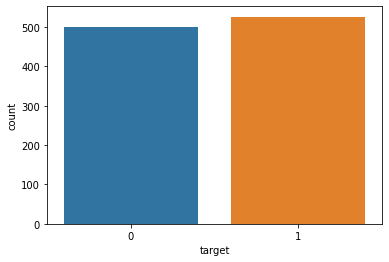

In [7]:
#Exploratory Data Analysis (EDA)
#First, analysing the target variable:
y = datas["target"]

sns.countplot(y)


target_temp = datas.target.value_counts()

print(target_temp)

In [8]:
#Number of male and female having heart disease
m=0
for i in datas.index:
    if(datas['sex'][i]==1 and datas['target'][i]==1):
        m=m+1
    else:
        continue
print(m)
#300 male are suffering from heart disease   



300


In [9]:
f=0
for i in datas.index:
    if(datas['sex'][i]==0 and datas['target'][i]==1):
        f=f+1
    else:
        continue
print(f)
#226 female are suffering from heart disease

226


In [10]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


<AxesSubplot:xlabel='sex', ylabel='target'>

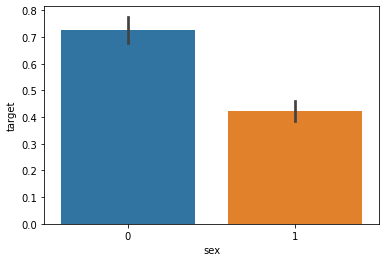

In [11]:
# Analysing the 'Sex' feature
datas["sex"].unique()
sns.barplot(datas["sex"],y)

# We notice, that females are more likely to have heart problems than males

<AxesSubplot:xlabel='cp', ylabel='target'>

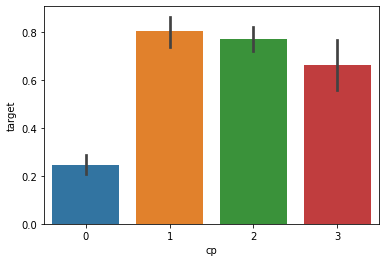

In [12]:
# Analysing the 'Chest Pain Type' feature
datas["cp"].unique()
#CP feature has values from 0 to 3
sns.barplot(datas["cp"],y)

In [13]:
## Analysing the FBS feature
datas["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

<AxesSubplot:xlabel='fbs', ylabel='target'>

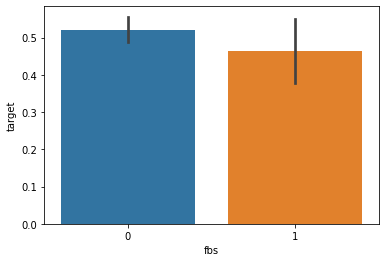

In [14]:
datas["fbs"].unique()
sns.barplot(datas["fbs"],y)

<AxesSubplot:xlabel='restecg', ylabel='target'>

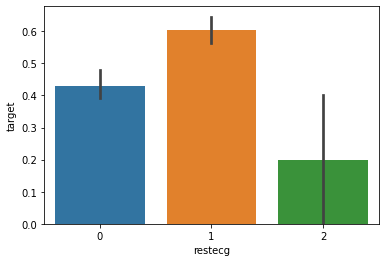

In [15]:
# Analysing the restecg feature
datas["restecg"].unique()
sns.barplot(datas["restecg"],y)
# We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

<AxesSubplot:xlabel='exang', ylabel='target'>

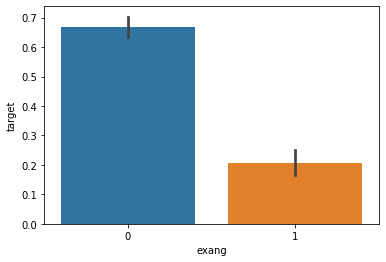

In [16]:
# Analysing the 'exang' feature
datas["exang"].unique()
sns.barplot(datas["exang"],y)

# People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

<AxesSubplot:xlabel='slope', ylabel='target'>

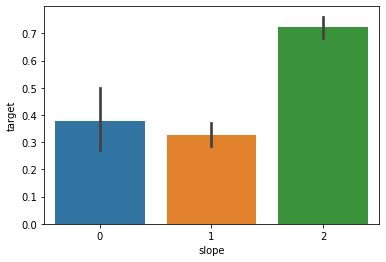

In [17]:
# Analysing the Slope feature
datas["slope"].unique()
sns.barplot(datas["slope"],y)
# We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

<AxesSubplot:xlabel='ca', ylabel='count'>

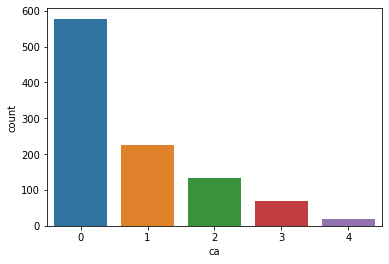

In [18]:
# Analysing the 'ca' feature
#number of major vessels (0-3) colored by flourosopy
datas["ca"].unique()
sns.countplot(datas["ca"])


<AxesSubplot:xlabel='ca', ylabel='target'>

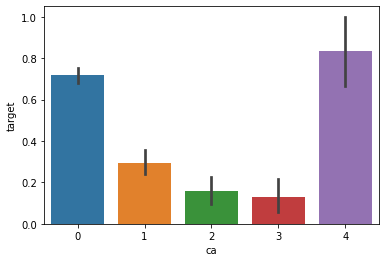

In [19]:
sns.barplot(datas["ca"],y)

# ca=4 has astonishingly large number of heart patients

<AxesSubplot:xlabel='thal', ylabel='target'>

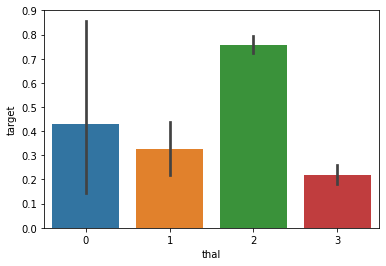

In [20]:
# Analysing the 'thal' feature
datas["thal"].unique()
sns.barplot(datas["thal"],y)

<AxesSubplot:xlabel='thalach'>

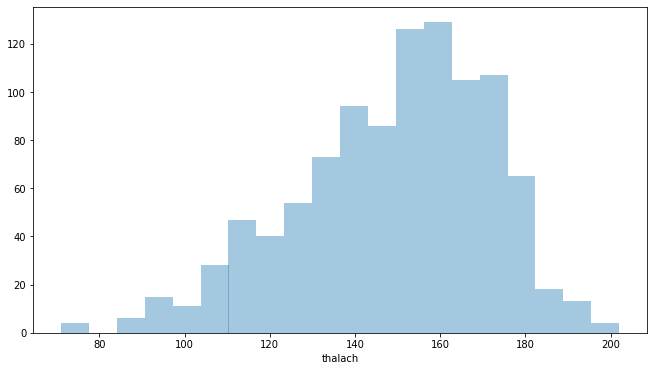

In [21]:
plt.figure(figsize=(11,6))
sns.distplot(datas['thalach'],kde=False,bins=20)
#maximum have a thalach between 160-170 i.e person having heart rate 160-170 suffer from heart disease

In [22]:
correlation=datas.corr()
print(correlation['target'].sort_values(ascending=False))

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


<AxesSubplot:>

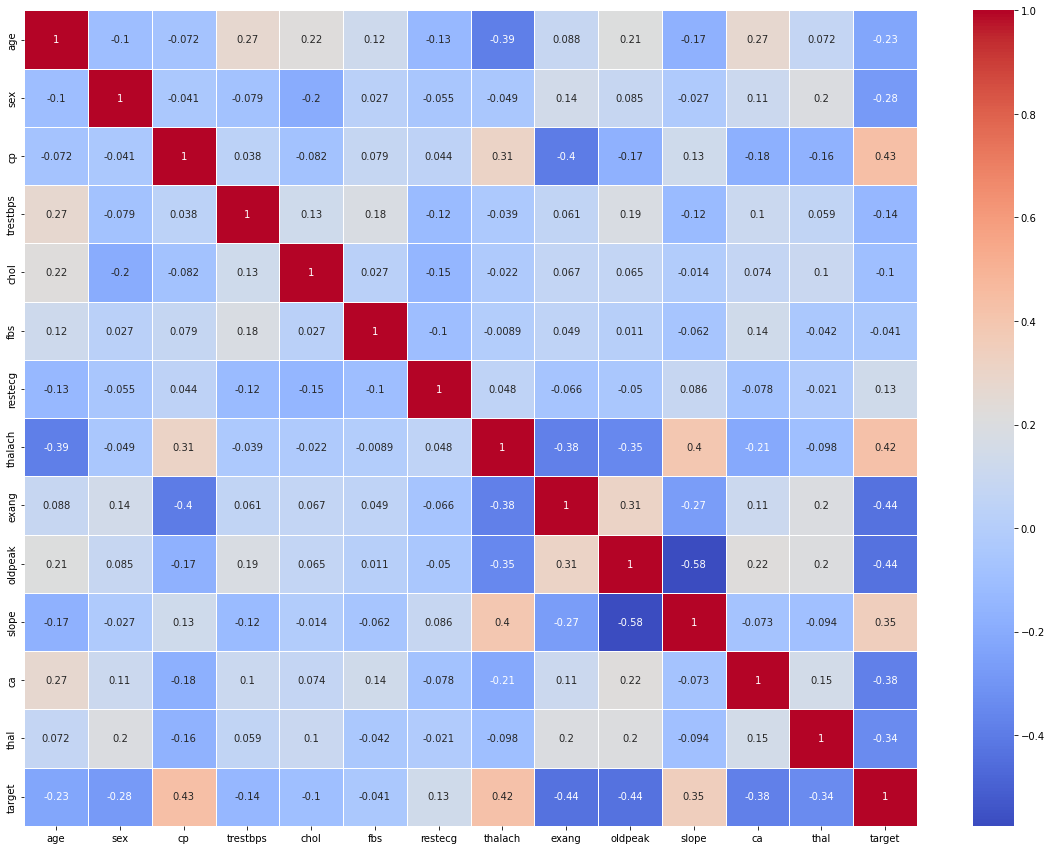

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation,annot=True,cmap='coolwarm',linewidths=.5)


In [24]:
#Maximum age
datas.groupby('target')['age'].max()
#for male maximum age is 76 and for female it is 77

target
0    77
1    76
Name: age, dtype: int64

In [25]:
#Minimum age
datas.groupby('target')['age'].min()

target
0    35
1    29
Name: age, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

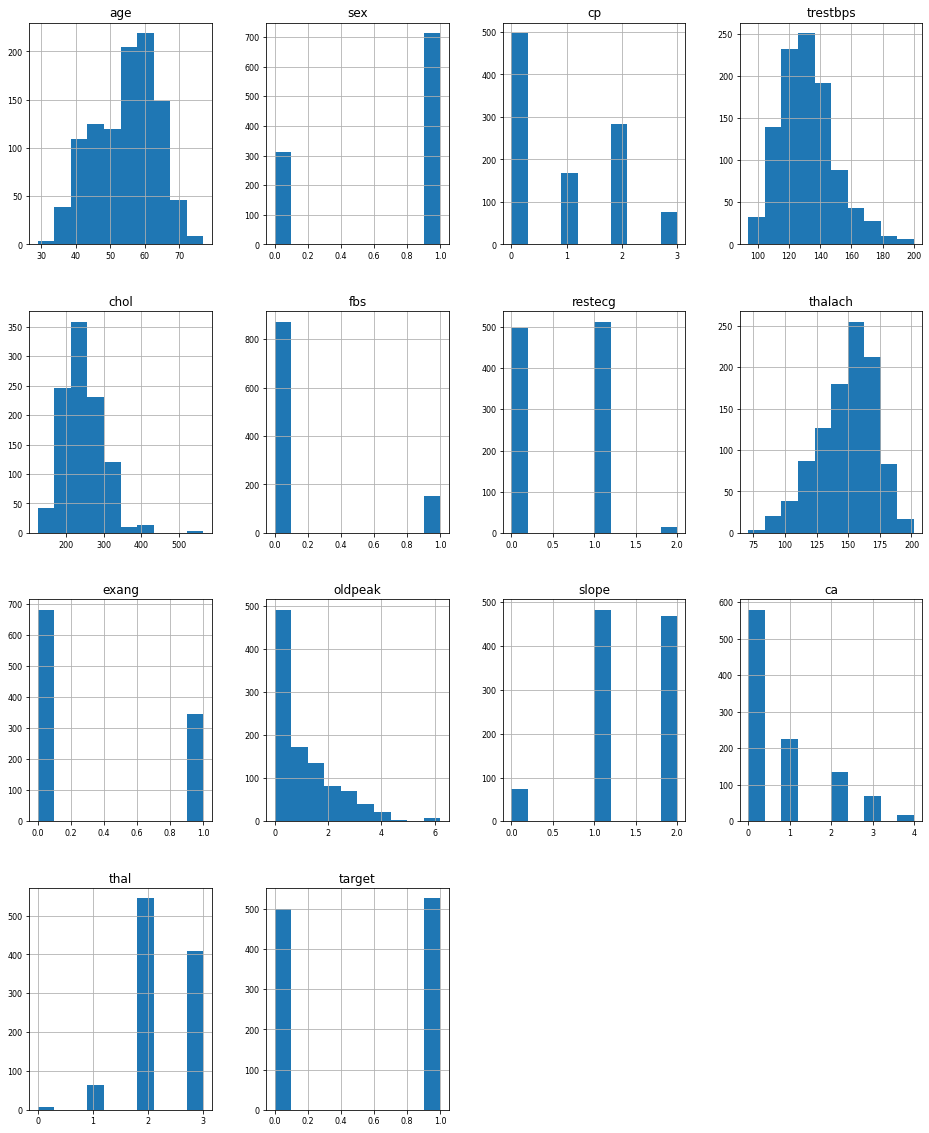

In [26]:
datas.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

<AxesSubplot:xlabel='age', ylabel='count'>

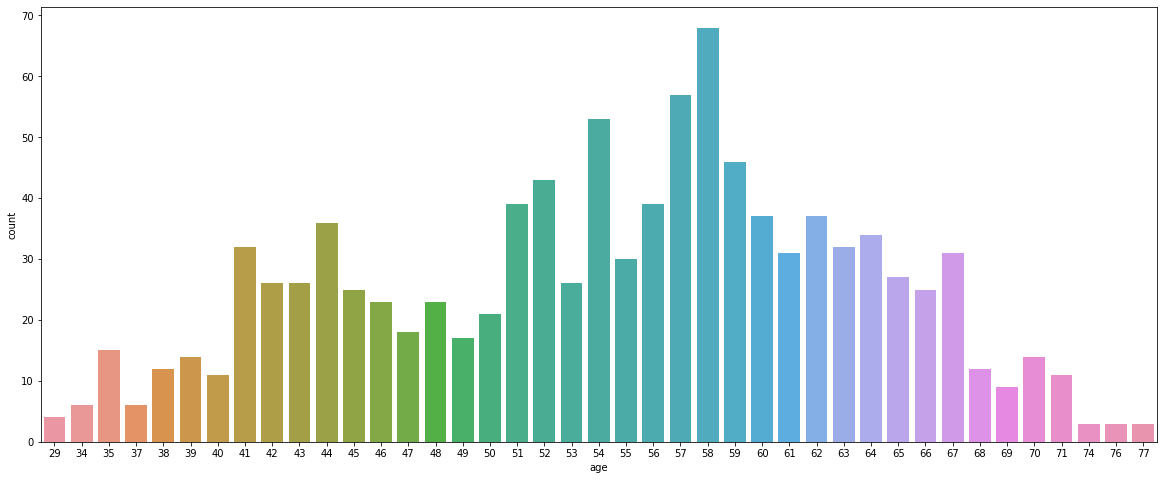

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(x=datas['age'])
#age of 52 - 60 are more prone to heart disease

In [28]:
#Train Test split
from sklearn.model_selection import train_test_split


predictors = datas.drop("target",axis=1)
target = datas["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [29]:
X_train.shape

(820, 13)

In [30]:
X_test.shape

(205, 13)

In [31]:
Y_train.shape

(820,)

In [32]:
Y_test.shape

(205,)

In [33]:
#  Model Fitting
from sklearn.metrics import accuracy_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)
Y_pred_lr.shape

(205,)

In [34]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


In [35]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
Y_pred_nb.shape

(205,)

In [36]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


In [37]:
#SVM
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape

(205,)

In [38]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


In [39]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape


(205,)

In [40]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


In [41]:
#Descison tree
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)

(205,)


In [42]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


In [43]:
#random forest
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape

(205,)

In [44]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using random forest is: "+str(score_rf)+" %")

The accuracy score achieved using random forest is: 100.0 %


In [45]:
#Neural Network
from keras.models import Sequential
from keras.layers import Dense

In [46]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2022-04-26 22:28:02.786331: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [47]:
model.fit(X_train,Y_train,epochs=300)

Y_pred_nn = model.predict(X_test)

Y_pred_nn.shape

rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

2022-04-26 22:28:03.168434: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
26/26 [==============================] - 1s 2ms/step - loss: 56.7608 - accuracy: 0.4890
Epoch 2/300
26/26 [==============================] - 0s 2ms/step - loss: 34.7749 - accuracy: 0.4890
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 12.3608 - accuracy: 0.4817
Epoch 4/300
26/26 [==============================] - 0s 2ms/step - loss: 3.8392 - accuracy: 0.4610
Epoch 5/300
26/26 [==============================] - 0s 2ms/step - loss: 2.9562 - accuracy: 0.4720
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 2.4039 - accuracy: 0.5159
Epoch 7/300
26/26 [==============================] - 0s 2ms/step - loss: 2.1155 - accuracy: 0.5390
Epoch 8/300
26/26 [==============================] - 0s 2ms/step - loss: 1.9455 - accuracy: 0.5305
Epoch 9/300
26/26 [==============================] - 0s 2ms/step - loss: 1.6702 - accuracy: 0.5634
Epoch 10/300
26/26 [==============================] - 0s 2ms/step - loss: 1.5173 - accuracy: 0.5866
Epoch 

In [48]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")


The accuracy score achieved using Neural Network is: 85.37 %


In [49]:
#Comparison of all machine learning algorithms and its final score
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","Neural network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using Neural network is: 85.37 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

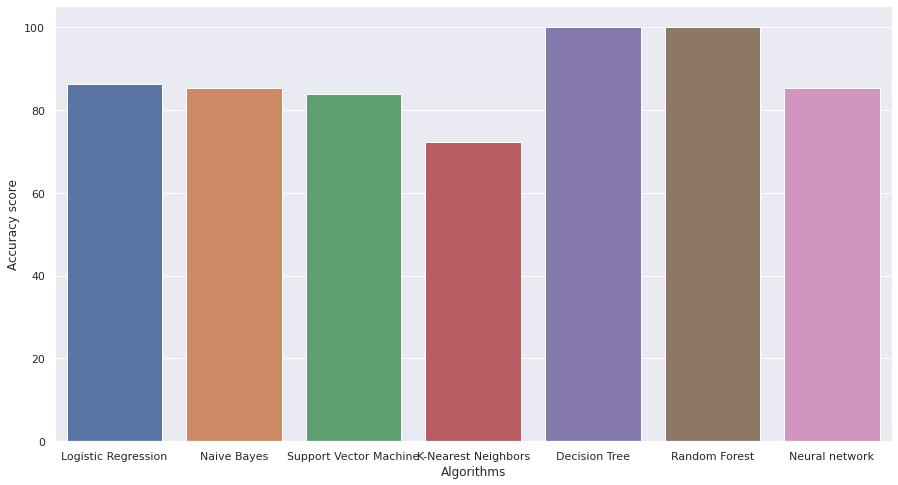

In [50]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)